# Regression Coefficientes

In [1]:
# Import modules
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math, warnings
import patsy
warnings.filterwarnings('ignore')
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

## With Table 

In [2]:
data1 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/METable.dta")
data1.head()

for i in ['refer', 'med_class_any_6', 'med_class_any_16']:
    label_encoder.fit(data1[i])
    data1[i] = label_encoder.transform(data1[i])
    data1[i] = np.where(data1[i] == 2, np.nan, data1[i])

data1.head()

,study,facilitycode,case,as_correct,as_h1,as_h2,as_h6,as_h7,as_h8,as_h12,...,kenya_fac_qual_code_2,kenya_fac_qual_code_3,price_kenya,facility_private,checklist_essential,sp_roster_age,sp_roster_bmi,sp_roster_bp,sp_roster_bp_sys,sp_roster_male
0,Kenya,9052302,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,230.0,Private,0.500,31,32.038578,130/80,130,Female
1,Kenya,9012207,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,Private,0.625,31,32.038578,130/80,130,Female
2,Kenya,9052301,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,400.0,Private,0.125,31,32.038578,130/80,130,Female
3,Kenya,9022203,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,250.0,Private,0.125,31,32.038578,130/80,130,Female
4,Kenya,9012206,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,300.0,Private,0.125,31,32.038578,130/80,130,Female


In [13]:
# plt.figure(figsize=(8, 12))
y = ["as_correct", "ch_correct", "cp_correct", "tb_correct"
     , "refer"
     , "med_any"
     ,"med_class_any_6", "med_class_any_16"
    ]
y_label_t = [
    "Asthma: Inhaler/Bronchodilator"
    , "Child Diarrhea: ORS"
    , "Chest Pain: Referencial/Aspirin/ECG"
    , "Tuberculosis: AFB Smear"
    , "Referred (non-diarrhea)"
    , "Any Medication"
    , "Antibiotics"
    , "Steroids"
]

fmla = " ~ facility_private + C(case_code)"
fmla1 = " ~ facility_private"

coef = []
lower = []
upper = []
p_v = []
varname = []


for i in y:
    try:
        # mdl = smf.glm(i + fmla, data = data1).fit()
        mdl = smf.logit(i + fmla, data = data1).fit();
    except:
        mdl = smf.logit(i + fmla1, data = data1).fit();
        # mdl = smf.glm(i + fmla1, data = data1).fit()
        # print(i + fmla1)
        
    coef_data = pd.DataFrame(mdl.summary().tables[1].data)
    coef_val = np.float_(np.array(coef_data.iloc[2, [1, 4, 5, 6]]))
    
    coef.append(coef_val[0])
    p_v.append(coef_val[1])
    lower.append(coef_val[2])
    upper.append(coef_val[3])
    varname.append(i)
                                  
        
df0 = pd.DataFrame(
    {
        "coef": coef,
        "p_value": p_v,
        "l": lower,
        "u": upper,
        "var": varname,
    }
)
df1 = pd.melt(df0,id_vars=['var', 'coef', "p_value"], var_name='range', value_name='range_val').round(3)


OR = df0.coef.map(math.exp)
new_or = []
for i in OR:
    vl = str(round(i, 2))
    new_or.append(vl)

Optimization terminated successfully.
         Current function value: 0.486007
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.486007
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.308251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.607698
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607698
         Iterations 5
         Current function value: 0.155485
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.187942
         Iterations 8
Optimization ter

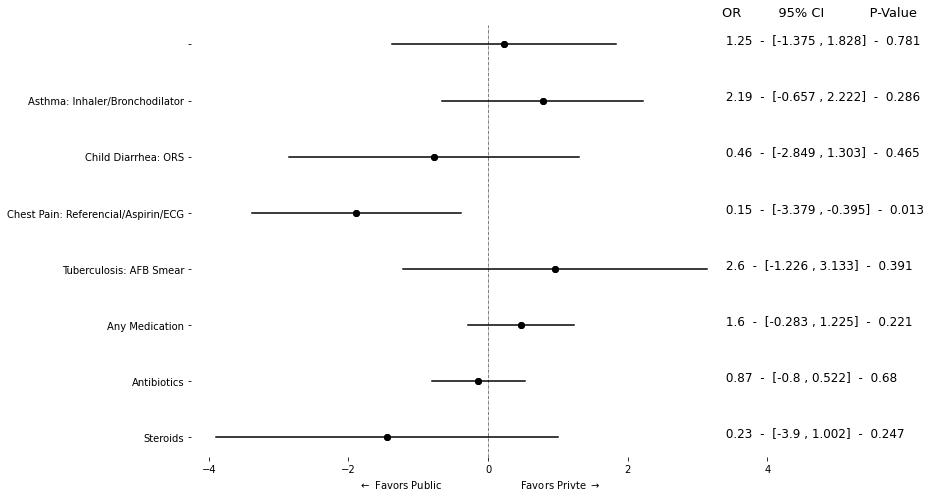

In [22]:
### Plots    

OR = df0.coef.map(math.exp)
new_or = []
for i in OR:
    new_vl = round(float(i), 2)
    new_or.append(new_vl)
    
df0["OR"] = new_or
table_reg = (" " + df0["OR"].map(str) + "  -  " +  "[" + df0.l.map(str) + " , " + df0.u.map(str) + "]" + "  -  " + df0.p_value.map(str))[::-1]

fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([.1, 1, 1, 1])

for i in y[::-1]:
    ref_data = df1[df1["var"] == i]
    ax.plot("range_val", "var", data = ref_data, color = "black")
    ax.scatter("coef", "var", data = ref_data, color = "black")
    
    
omit_all = ['left', 'right', 'top', 'bottom']

ax.spines[omit_all].set_visible(False)

ax.axvline(0, linestyle = "-.", lw = .5, color = "black")

for i in range(8):
    lbl = table_reg.iloc[i]
    ax.text(3.35, i, lbl, size=12);

ax.text(3.35, 7.5, "OR         95% CI           P-Value", size = 13);

ax.set_xticks(np.arange(-4, 4.1, 2))
ax.set_xlabel(r"$\leftarrow$ Favors Public                         Favors Privte $\rightarrow$")
ax.set_yticklabels(y_label_t[::-1])
plt.show();

## With Tables of Two Datasets

In [25]:
data1 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/METable2data.dta")
data2 = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/METable2data2.dta")
data1['case_3'] = np.where(data1.case == "Case 3", 1, 0)

In [26]:
y_vars = [
    "correct", 
    "treat_cxr", 
    "re_3", 
    "re_4", 
    "med_any", 
    "med_l_any_2", 
    "med_l_any_3", 
    "med_k_any_9"
]

In [28]:
for j in [data1, data2]:
    for i in y_vars:
        # print(i)
        label_encoder.fit(j[i])
        j[i] = label_encoder.transform(j[i])

In [49]:
coef0 = []
l0 = []
u0 = []
y_pos = []
y_label = []
p_val = []
y_0 = len(y_vars) 

fmla = '~ case_3  + C(city) + C(type_formal)'
for i in y_vars:
    while y_0 > 0:
        y_pos.append(y_0)
        y_0 = y_0 - 1
    y1, x_1 = patsy.dmatrices(i + fmla, data = data1, return_type='dataframe')
    logit_glm = sm.GLM(y1, x_1, var_weights=data1['weight_city'], family = sm.families.Binomial()).fit(cov_type='HC1').summary().tables[1]
    # print(logit_glm)
    logit_arr = np.float_(pd.DataFrame(logit_glm.data).iloc[4, [1, 2, 4]])
    c = np.exp(logit_arr[0])
    coef0.append(c)
    l0.append(c - 1.96 * logit_arr[1])
    u0.append(c + 1.96 * logit_arr[1])
    p_val.append(logit_arr[2])
    # print(logit_df)
    y_label.append(i)

df1 = pd.DataFrame({"point": coef0, "l" : l0, 'u': u0, "label" : y_label, "y_pos": y_pos, 'pval': p_val})
df11 = pd.melt(df1, id_vars=['point', 'label', 'y_pos', "pval"], value_vars=['l', 'u'])

In [50]:
fmla2 = '~ sp4_spur_1'
coef = []
l = []
u = []
y_pos = []
y_label = []
y_0 = len(y_vars) 
p_val = []

for i in y_vars:
    while y_0 > 0:
        y_pos.append(y_0)
        y_0 = y_0 - 1
    
    mdl2 = smf.logit(i + fmla2, data = data2).fit().summary().tables[1]
    # print(mdl2)
    coefs = np.float_(pd.DataFrame(mdl2.data).iloc[2, [1, 2, 4]])
    c = coefs[0]
    coef.append(np.exp(c))
    l.append(np.exp(c) - 1.96 * coefs[1])
    u.append(np.exp(c) + 1.96 * coefs[1])
    y_label.append(i)
    p_val.append(coefs[2])

df2 = pd.DataFrame({"point": coef, "l" : l, 'u': u, "label" : y_label, "y_pos": y_pos, "pval": p_val})
df21 = pd.melt(df2, id_vars=['point', 'label', 'y_pos', "pval"], value_vars=['l', 'u'])

Optimization terminated successfully.
         Current function value: 0.648644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.161501
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.635826
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.638312
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.495496
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.320903
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.649982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.097266
         Iterations 8


In [73]:
df1 = df1.round(2)
df2 = df2.round(2)
# df1.iloc[0, :]

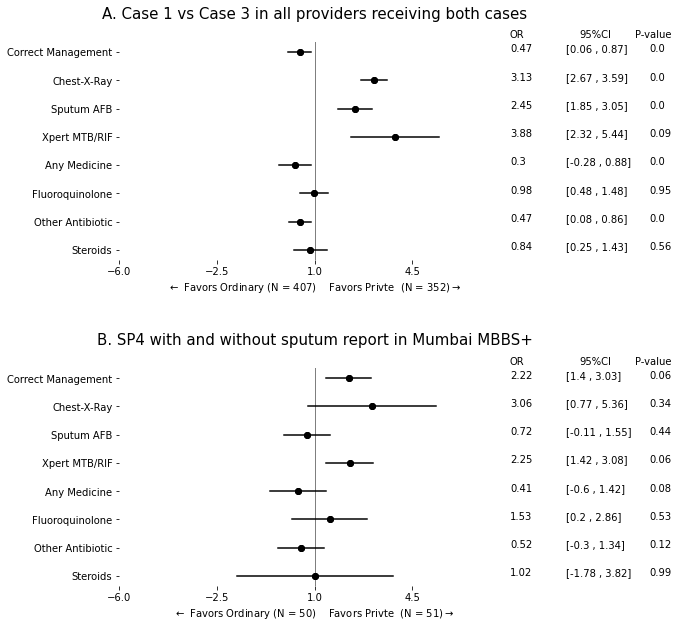

In [136]:
fig, ax = plt.subplots(2, 1, facecolor = "white", figsize = (7, 10))
fig.subplots_adjust(hspace = .5)

max_r = 7

for i in y_vars:
    ref_data1 = df11[df11.label == i]
    ax[0].plot('value', 'y_pos', data = ref_data1, c = "black")
ax[0].scatter("point", "y_pos", data = df11, c = "black")

for i in y_vars:
    ref_data2 = df21[df21.label == i]
    ax[1].plot('value', 'y_pos', data = ref_data2, c = "black")
ax[1].scatter("point", "y_pos", data = df21, c = "black")

omit = ['top', 'bottom', 'right', 'left']
ylabels = [
    'Steroids', 'Other Antibiotic', 'Fluoroquinolone', 'Any Medicine', 'Xpert MTB/RIF', 'Sputum AFB', 
    'Chest-X-Ray', 'Correct Management'
]
           

for i in range(2):
    ax[i].spines[omit].set_visible(False)
    ax[i].set_xlim(1 - max_r, 1 + max_r)
    ax[i].axvline(1, c = 'black', lw = 1, alpha = .5)
    ax[i].set_yticks(range(1, len(df1) + 1))
    ax[i].set_yticklabels(ylabels)
    ax[i].set_xticks(np.arange(-6, 8, 3.5))
    ax[i].text(max_r + 1, len(df1) + .5 , "OR") # OR
    ax[i].text(max_r + 3.5, len(df1) + .5, "95%CI") # CI
    ax[i].text(max_r + 5.5, len(df1) + .5, "P-value") # CI

for i in range(len(df1)):
    ref_t1 = np.array(df1.iloc[i, :])
    ax[0].text(max_r + 1, ref_t1[4], ref_t1[0]) # OR
    ax[0].text(max_r + 3, ref_t1[4], f"[{ref_t1[1]} , {ref_t1[2]}]", ) # CI
    ax[0].text(max_r + 6, ref_t1[4], ref_t1[5]) # P-value
    
    ax[0].set_xlabel(r"$\leftarrow$ Favors Ordinary (N = 407)    Favors Privte  (N = 352)$\rightarrow$")
    ax[0].set_title("A. Case 1 vs Case 3 in all providers receiving both cases\n", size = 15)
for i in range(len(df2)):
    ref_t1 = np.array(df2.iloc[i, :])
    ax[1].text(max_r + 1, ref_t1[4], ref_t1[0]) # OR
    ax[1].text(max_r + 3, ref_t1[4], f"[{ref_t1[1]} , {ref_t1[2]}]", ) # CI
    ax[1].text(max_r + 6, ref_t1[4], ref_t1[5]) # P-value
    ax[1].set_xlabel(r"$\leftarrow$ Favors Ordinary (N = 50)    Favors Privte  (N = 51)$\rightarrow$")
    ax[1].set_title("B. SP4 with and without sputum report in Mumbai MBBS+\n", size = 15)

# ax[0].set_xlim(0, 10)

## With Graded error bars

In [10]:
from linearmodels.panel import PanelOLS as fe

data3 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ReplicationDataGhanaJDE_short.dta")
data3.head(3)

data30 = data3[(data3.wave >= 2) & (data3.cashtreat != 1)]

def f1(df, a, b):
    cond = (df.a == 3) & (df.b == 1)
    return cond


data30_she = data30.groupby('sheno')
data30['treatment'] = data30_she['wave'].transform(lambda x: x == 3 ) & data30_she['timetreat'].transform(lambda x: x == 1 )
data30['control'] = data30_she['control'].transform(lambda x: all(x))
data30['after'] = data30_she['wave'].transform(lambda x: np.where(x >=3, True, False))


features = [
    "realfinalprofit", 
    "expend_health_3months", 
    "expend_education_3months", 
    "expend_total_3months",
    "wave", 
    "equiptreat",
    "after",
    "sheno"
]
data31 = data30[(data30['treatment'] == True) | (data30.control == True)][features]
data31 = data31.set_index(['sheno', 'wave'])
data31.head()

realfinalprofit  expend_health_3months  \
sheno     wave                                           
110101604 5          351.575378                    5.0   
          3          205.722168                    0.0   
          6          402.129395                   23.0   
          4          322.331146                    0.0   
          2          228.246490                    0.0   

                expend_education_3months  expend_total_3months  equiptreat  \
sheno     wave                                                               
110101604 5                          0.0                  45.0           0   
          3                          0.0                  32.0           0   
          6                          0.0                  73.0           0   
          4                          0.0                  25.0           0   
          2                          0.0                  30.0           0   

                after  
sheno     wave         
110101604 5      True  
          3      True  
          6      True  
          4      True  
          2     False

In [11]:
y = [ 
    "realfinalprofit", 
     "expend_health_3months", 
    "expend_education_3months", 
    "expend_total_3months"
]

fmla = " ~ equiptreat * after - 1"

c, Ci90, Ci95 = [], [], []
y_pos = []
y_lbl = []
y_n = 1
for i in y:
    y_lbl.append([i, i])
    while y_n <= len(y):
        y_pos.append([y_n, y_n])
        y_n = y_n + 1
    y_data, x_data = patsy.dmatrices(i + fmla, data = data31, return_type='dataframe')
    x_data1 = x_data['equiptreat:after[T.True]']
    y_data, x_data1
    mdl = fe(y_data, exog = x_data1, time_effects=True, drop_absorbed = True).fit( cov_type='clustered'
            , cluster_entity = True )
    ci95 = np.array(mdl.conf_int().iloc[0, [0, 1]])
    ci90 = np.array(mdl.conf_int(.9).iloc[0, [0, 1]])
    Ci90.append(ci90)
    Ci95.append(ci95)
    c.append([mdl.params[0], mdl.params[0]])

c = np.concatenate(c)    
Ci90 = np.concatenate(Ci90)
Ci95 = np.concatenate(Ci95)    
y_pos = np.concatenate(y_pos)
y_lbl = np.concatenate(y_lbl)
df3 = pd.DataFrame(
    {
       "point": c, 
       "ci90": Ci90, 
       "ci95": Ci95, 
       "y_pos": y_pos 
    }
)

,point,ci90,ci95,y_pos
0,-9.476182,-30.082561,-34.033920,1
1,-9.476182,11.130197,15.081556,1
2,-9.610347,-23.957912,-26.709284,2
3,-9.610347,4.737218,7.488590,2
4,18.580187,-9.496230,-14.880299,3
5,18.580187,46.656605,52.040673,3
6,19.035654,-15.885621,-22.581464,4
7,19.035654,53.956929,60.652772,4


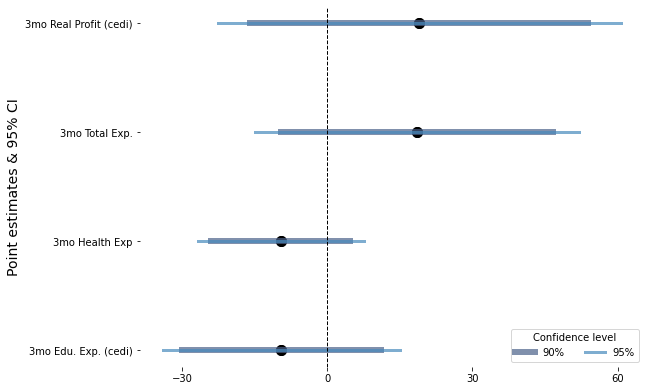

In [12]:
fig = plt.figure(facecolor='white', figsize=(7, 5))
ax = fig.add_axes([.1, 1, 1, 1])
lws = [6, 3]
colors = ["#4b6189", "#478abc"]
for i in range(4):
    ref_data = df3[df3.y_pos == i]
    plt.scatter("point", "y_pos", data = ref_data, color = "black", label = "", s = 100)
    plt.plot("ci90", 'y_pos', data = ref_data, color = colors[0], lw = lws[0], alpha = .7, label = "")
    plt.plot("ci95", 'y_pos', data = ref_data, color = colors[1], lw = lws[1], alpha = .7, label = "")

ref_data = df3[df3.y_pos == 4]
ax.scatter("point", "y_pos", data = ref_data, color = "black", label = "", s = 100)
ax.plot("ci90", 'y_pos', data = ref_data, color = colors[0], lw = lws[0], alpha = .7, label = "90%")
ax.plot("ci95", 'y_pos', data = ref_data, color = colors[1], lw = lws[1], alpha = .7, label = "95%")

omit = ['top', 'bottom', 'left', 'right']
y_labels = ['3mo Edu. Exp. (cedi)', '3mo Health Exp', '3mo Total Exp.', '3mo Real Profit (cedi)']
ax.legend(title = "Confidence level", ncol = 2)
ax.axvline(0, color = "black", lw = 1, linestyle = "--")
ax.set_yticks(range(1, 5))
ax.set_xticks(np.arange(-30, 61, 30))
ax.set_yticklabels(y_labels)
ax.set_ylabel("Point estimates & 95% CI", size = 14)
ax.spines[omit].set_visible(False)

## Marginal Effect

In [16]:
data4 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/RegCoefME.dta")
data4.head()

,study,facilitycode,case,as_correct,as_h1,as_h2,as_h6,as_h7,as_h8,as_h12,...,kenya_fac_qual_code_2,kenya_fac_qual_code_3,price_kenya,facility_private,checklist_essential,sp_roster_age,sp_roster_bmi,sp_roster_bp,sp_roster_bp_sys,sp_roster_male
0,Kenya,9052302,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,230.0,Private,0.500,31,32.038578,130/80,130,Female
1,Kenya,9012207,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,Private,0.625,31,32.038578,130/80,130,Female
2,Kenya,9052301,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,400.0,Private,0.125,31,32.038578,130/80,130,Female
3,Kenya,9022203,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,250.0,Private,0.125,31,32.038578,130/80,130,Female
4,Kenya,9012206,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,300.0,Private,0.125,31,32.038578,130/80,130,Female


In [17]:
y4 = [
   'as_correct', 'ch_correct', 'cp_correct', 'tb_correct', 
    # "refer"
    "med_any", "med_class_any_6", "med_class_any_16"]

for i in y4:
    label_encoder.fit(data4[i])
    data4[i] = label_encoder.transform(data4[i])
    
    data4[i] = np.where(data4[i] == 2, np.nan, data4[i])
    # print(set(data4[i]))

In [18]:

md1 = " ~ facility_private + C(case_code)"
md2 = " ~ facility_private"


ci95 = [] # CI
c = [] # cofficiente
y_n = [] # y posicion
y_name = [] # y label
y_label = []

id_m = 0 # axis 0

main_row = 2

correct_array = ['as_correct', 'ch_correct', 'cp_correct', 'tb_correct']

for i in y4:
    
    while id_m < len(y4): ## Y variables
        y_n.append([id_m + 1, id_m + 1, id_m + 1, id_m + 1])
        id_m = id_m + 1
    ### ols
    
    if i in correct_array:
        mdl_ols = smf.ols(i + md2, data = data4).fit()
    else:
        mdl_ols = smf.ols(i + md1, data = data4).fit()
        # print(i)
        # print(pd.DataFrame(mld_ols.summary().tables[1].data))
    
    coef_ols = np.float_(pd.DataFrame(mdl_ols.summary().tables[1].data).iloc[main_row, [1, 2]])
    
    point = coef_ols[0]
    std = coef_ols[1]
    
    y_label.append([i, i])
    y_name.append(["ols", "ols"])
    c.append([point, point])
    ci95.append([point + 1.96 * std, point - 1.96 * std])
    
    ### GLM
    if i in correct_array:
        mdl_glm = smf.logit(i + md2, data = data4).fit()
    else:
        mdl_glm = smf.logit(i + md2, data = data4).fit()
    
    coef_glm = np.float_(pd.DataFrame(mdl_glm.get_margeff().summary().tables[1].data).iloc[main_row - 1 , [1, 2]])
    
    point_glm = coef_glm[0]
    std_glm = coef_glm[1]
    
    y_label.append([i, i])
    y_name.append(["glm", "glm"])
    c.append([point_glm, point_glm])
    ci95.append([point_glm + 1.96 * std_glm, point_glm - 1.96 * std_glm])


Optimization terminated successfully.
         Current function value: 0.486007
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.308251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.607698
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597636
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692627
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.086124
         Iterations 9


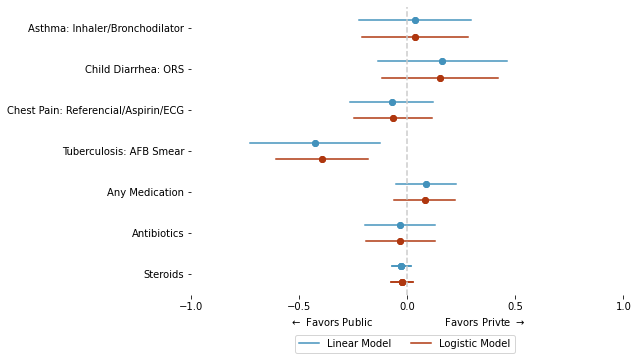

In [21]:
df41 = pd.DataFrame(
    {
        "modelo": np.concatenate(y_name), 
        "ylbel": np.concatenate(y_label),
        "y_pos": np.concatenate(y_n),
        "coef": np.concatenate(c), 
        "ci": np.concatenate(ci95)
    }
)
fig = plt.figure()
ax = fig.add_axes([.1, 1, 1, 1])

mdls = ['ols', 'glm']
y_val = np.unique(df41.y_pos)
separate = .2
colors = ['#4392bc', '#af370f']

for i in mdls:
    for j in y_val:
        ref_data = df41[(df41.y_pos == j) & (df41.modelo == i)]
        
        if i == "ols":
            ref_data['y_pos'] = 8 - ref_data['y_pos'] + separate 
            cl = colors[0]
        elif i == "glm":
            cl = colors[1]
            ref_data['y_pos'] = 8- ref_data['y_pos'] - separate 
            
        ax.plot("ci", "y_pos", data = ref_data, c = cl, label = "")
        ax.scatter("coef", "y_pos", data = ref_data, c = cl, label = "")
        # ax.text("coef", "y_pos", "ylbel", data = ref_data)

for i in mdls:
    ref_data = df41[(df41.y_pos == 7) & (df41.modelo == i)]
    if i == "ols":
        ref_data['y_pos'] = 8 - ref_data['y_pos'] + separate 
        cl = colors[0]
        lbl = "Linear Model"
    elif i == "glm":
        cl = colors[1]
        ref_data['y_pos'] = 8 - ref_data['y_pos'] - separate 
        lbl = "Logistic Model"
            
    ax.plot("ci", "y_pos", data = ref_data, c = cl, label = lbl)
    ax.scatter("coef", "y_pos", data = ref_data, c = cl, label = "")
            
y_label_t = [
    "Asthma: Inhaler/Bronchodilator"
    , "Child Diarrhea: ORS"
    , "Chest Pain: Referencial/Aspirin/ECG"
    , "Tuberculosis: AFB Smear"
    # , "Referred (non-diarrhea)"
    , "Any Medication"
    , "Antibiotics"
    , "Steroids"
]
omit = ['top', 'right', 'left', 'bottom']
ax.spines[omit].set_visible(False)      
ax.set_xlabel(r"$\leftarrow$ Favors Public                       Favors Privte $\rightarrow$")
ax.set_xlim(-1, 1)
ax.set_xticks(np.arange(-1, 1.1, .5))
ax.set_yticks(np.arange(1, 7.1, 1))
ax.set_yticklabels(y_label_t[::-1])
ax.legend(ncol = 2, loc = (.24, -.2))
ax.axvline(0, linestyle = "--", lw = 1.5, color = "#cccccc")
plt.show();

## Multiple Outcomes

In [17]:
data5 = pd.read_csv("https://github.com/d2cml-ai/python_visual_library/raw/reg-coef/data/GhanaJDE.csv")
features = [
     "expend_health_3months", 
    "expend_education_3months", 
    "expend_total_3months",
    'realfinalprofit', 'cashtreat', 'equiptreat', 'after', 'wave', 'sheno']

data5 = data5[features]
data5_inx = data5.set_index(['sheno', 'wave'])
data5_inx


data5 = pd.read_csv("https://github.com/d2cml-ai/python_visual_library/raw/reg-coef/data/GhanaJDE.csv")
features = [
     "expend_health_3months", 
    "expend_education_3months", 
    "expend_total_3months",
    'realfinalprofit', 'cashtreat', 'equiptreat', 'after', 'wave', 'sheno']

data5 = data5[features]
data5_inx = data5.set_index(['sheno', 'wave'])
data5_inx.head()

expend_health_3months  expend_education_3months  \
sheno     wave                                                    
110101604 5                       5.0                       0.0   
          3                       0.0                       0.0   
          6                      23.0                       0.0   
          4                       0.0                       0.0   
          2                       0.0                       0.0   

                expend_total_3months  realfinalprofit  cashtreat  equiptreat  \
sheno     wave                                                                 
110101604 5                     45.0       351.575378          0           0   
          3                     32.0       205.722168          0           0   
          6                     73.0       402.129395          0           0   
          4                     25.0       322.331146          0           0   
          2                     30.0       228.246490          0           0   

                after  
sheno     wave         
110101604 5      True  
          3      True  
          6      True  
          4      True  
          2     False

In [18]:
y = [ 
    "expend_education_3months", 
     "expend_health_3months", 
    "expend_total_3months",
    "realfinalprofit"
]

y_label = []
ci = []
c = []
y_pos = []
y_lbl = []
y_ticks_lbl = []

y_n = 1

for i in y:
    while y_n <= len(y):
        y_pos.append(np.repeat(y_n, 4))
        y_n = y_n + 1
    #----
    flma = i + " ~ (cashtreat + equiptreat) * after - 1"
    y_data, x_data = patsy.dmatrices(flma, data5_inx, return_type='dataframe')
    x_data1 = x_data.filter(['cashtreat:after[T.True]',
           'equiptreat:after[T.True]'])
    #----
    mdl = fe(y_data, exog = x_data1, time_effects=True, entity_effects=True).fit(cov_type='clustered'
            , cluster_entity = True )
    #---
    
    y_ll = ['cash', 'cash', 'kind', 'kind']
    y_lbl.append(y_ll)
    
    y_ticks_lbl.append(np.repeat(i, 4))
    
    point_cash = mdl.params[0]
    point_kind = mdl.params[1]
    
    cash_ci = np.array(mdl.conf_int().iloc[0, [0, 1]])
    kind_ci = np.array(mdl.conf_int().iloc[1, [0, 1]])
    
    c.append([point_cash, point_cash, point_kind, point_kind])
    ci.append([cash_ci, kind_ci])
    
    

y_pos = np.concatenate(y_pos)
c = np.concatenate(c)
ci = np.concatenate(np.concatenate(ci))
y_lbl = np.concatenate(y_lbl)
lbls_y = np.concatenate(y_ticks_lbl)

df5 = pd.DataFrame(
    {
       "y_pos": y_pos, 
       "point": c, 
       "ci": ci, 
       "type": y_lbl, 
        "y": lbls_y
    }
)

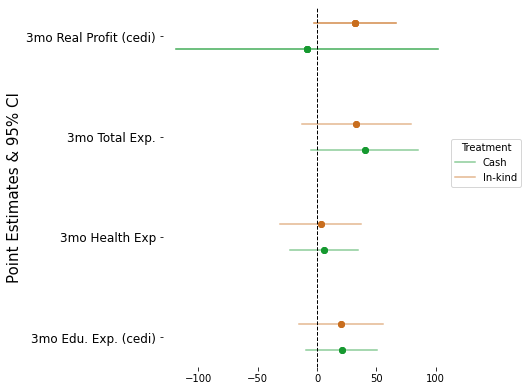

In [19]:
d_iff, alphha = .13, .5
df5['y_pos1'] = np.where(df5['type'] == "cash", df5['y_pos'] - d_iff, df5['y_pos'] + d_iff)
cls = ["#c96e1e", '#169930']

fig = plt.figure(facecolor='white', figsize=(4, 5))
ax = fig.add_axes([.1, 1, 1, 1])


for i in y:
    for j in ['cash', 'kind']:
        if j == 'cash':
            cl = cls[1]
        else:
            cl = cls[0]
            
        ref_data = df5[(df5['type'] == j) & (df5['y'] == i)]
        ax.scatter("point", "y_pos1", data = ref_data, color = cl, label = "")
        ax.plot("ci", "y_pos1", data = ref_data, color = cl, label = "", alpha = alphha)

for j in ['cash', 'kind']:
    if j == 'cash':
        cl = cls[1]
        lbl = "Cash"
    else:
        cl = cls[0]
        lbl = "In-kind"

    ref_data = df5[(df5['type'] == j) & (df5['y'] == "realfinalprofit")]
    ax.scatter("point", "y_pos1", data = ref_data, color = cl, label = "")
    ax.plot("ci", "y_pos1", data = ref_data, color = cl, label = lbl, alpha = alphha)        
        
y_labels = ['3mo Edu. Exp. (cedi)', '3mo Health Exp', '3mo Total Exp.', '3mo Real Profit (cedi)']
omit = ['top', 'bottom', 'left', 'right']
        
ax.legend(title = "Treatment", loc = (1, .5))
ax.axvline(0, lw = 1, linestyle = "--", color = "black")

ax.set_ylabel("Point Estimates & 95% CI", size = 15)
ax.set_yticks(range(1, 5))
ax.set_xticks(np.arange(-100, 101, 50))
ax.set_yticklabels(y_labels, size = 12)
ax.spines[omit].set_visible(False)


## Point Estimates by Rounds

In [20]:
data6 = pd.read_csv("https://github.com/d2cml-ai/python_visual_library/raw/reg-coef/data/GhanaJDE.csv")
features = ['realfinalprofit', 'cashtreat', 'equiptreat', 'after', 'wave', 'sheno']

data6 = data6[features]
data6['wave1'] = data6['wave'].astype('category')
data6_inx = data6.set_index(['sheno', 'wave'])
data6_inx.head()

flma = "realfinalprofit ~ (cashtreat + equiptreat) * wave1 -1"
y_data, x_data = patsy.dmatrices(flma, data6_inx, return_type='dataframe')

x_data1 = x_data.filter(regex=r"cashtreat:|equiptreat:")

mdl = fe(y_data, exog = x_data1, time_effects=True, entity_effects=True).\
fit(cov_type='clustered', cluster_entity = True )

In [21]:
c = []
ci = []
x_p = mdl.params
x_ci = mdl.conf_int()
for i in range(0, len(x_p)):
    
    c.append([x_p[i], x_p[i]])
    ci.append(np.array(x_ci.iloc[i, [0, 1]]))
    
x_n = np.arange(1, 5, 1)

c = np.concatenate(c)
ci = np.concatenate(ci)
lbl = np.concatenate([np.repeat("cash", 8), np.repeat("equi", 8)])
x_pos = np.concatenate([np.repeat(x_n, 2), np.repeat(x_n, 2)])

df6 = pd.DataFrame(
    {
        "point": c,
        "ci" : ci, 
        "treat" : lbl, 
        "x" :  x_pos 
    }
)
sep = .15
df6['x_pos'] = np.where(df6.treat == 'cash', df6.x - sep, df6.x + sep)
df6.head()

,point,ci,treat,x,x_pos
0,0.396657,-96.518288,cash,1,0.85
1,0.396657,97.311602,cash,1,0.85
2,-25.720863,-150.319739,cash,2,1.85
3,-25.720863,98.878013,cash,2,1.85
4,-16.036545,-124.272709,cash,3,2.85


Text(0, 0.5, 'Point Estimates & 95% CI')

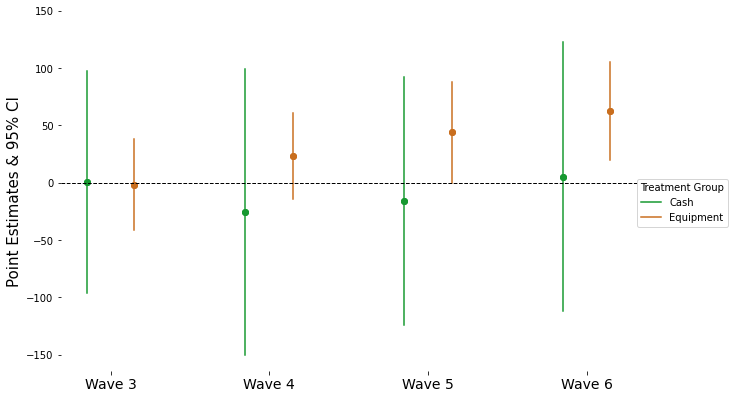

In [22]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([.1, 1, 1, 1])
cls = ["#169930", '#c96e1e']
omit = ['right', 'left', 'top', 'bottom']
alpha = 1
for i in ['cash', 'equi']:
    for j in x_n:
        ref_data = df6[(df6.x == j) & (df6.treat == i)]
        if i == 'cash':
            cl = cls[0]
        else:
            cl = cls[1]
        plt.plot("x_pos", 'ci', data = ref_data, c = cl, label = "")
        plt.scatter('x_pos', 'point', data = ref_data, c = cl, label = "")
        
for i in ['cash', 'equi']:
    ref_data = df6[(df6.x == j) & (df6.treat == 1)]
    if i == 'cash':
        cl = cls[0]
        lbl = "Cash"
    else:
        cl = cls[1]
        lbl = "Equipment"
    plt.plot("x_pos", 'ci', data = ref_data, c = cl, label = lbl)
    plt.scatter('x_pos', 'point', data = ref_data, c = cl, label = "")
        
x_ti_labels = ['Wave 3', 'Wave 4', 'Wave 5', "Wave 6"] 
ax.legend(title = "Treatment Group", loc = (1, .4), )
ax.axhline(0, c = 'black', lw = 1, linestyle = "--")

ax.spines[omit].set_visible(False)
ax.set_yticks(np.arange(-150, 151, 50))
ax.set_xticks(np.arange(1, 5, 1))
ax.set_xticklabels(x_ti_labels, size = 14)
ax.set_ylabel("Point Estimates & 95% CI", size = 15)
plt.show();